In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [19]:
ads = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\ads_data.csv', parse_dates=['date', 'time'])

In [21]:
ads.head()

date                time event platform   ad_id  client_union_id  \
0 2019-04-01 2019-04-01 00:00:48  view  android   45061            34734   
1 2019-04-01 2019-04-01 00:00:48  view      web  121288           121288   
2 2019-04-01 2019-04-01 00:01:03  view  android  102737           102535   
3 2019-04-01 2019-04-01 00:01:03  view  android  107564           106914   
4 2019-04-01 2019-04-01 00:01:09  view  android    4922               37   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410  
3             107564          CPM    217.3          0                  62711  
4               4400          CPC     60.1          0                1183501

In [20]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   date                   1000000 non-null  datetime64[ns]
 1   time                   1000000 non-null  datetime64[ns]
 2   event                  1000000 non-null  object        
 3   platform               1000000 non-null  object        
 4   ad_id                  1000000 non-null  int64         
 5   client_union_id        1000000 non-null  int64         
 6   campaign_union_id      1000000 non-null  int64         
 7   ad_cost_type           1000000 non-null  object        
 8   ad_cost                1000000 non-null  float64       
 9   has_video              1000000 non-null  int64         
 10  target_audience_count  1000000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 83.9+ MB


In [22]:
ads.describe(include='all')

date                           time    event  \
count                      1000000                        1000000  1000000   
unique                         NaN                            NaN        2   
top                            NaN                            NaN     view   
freq                           NaN                            NaN   890822   
mean    2019-04-04 10:50:13.142400  2019-04-04 21:48:32.040999680      NaN   
min            2019-04-01 00:00:00            2019-04-01 00:00:48      NaN   
25%            2019-04-04 00:00:00            2019-04-04 12:19:25      NaN   
50%            2019-04-05 00:00:00            2019-04-05 06:16:53      NaN   
75%            2019-04-05 00:00:00            2019-04-05 15:39:30      NaN   
max            2019-04-06 00:00:00            2019-04-05 23:59:30      NaN   
std                            NaN                            NaN      NaN   

       platform           ad_id  client_union_id  campaign_union_id  \
count   1000000  1000000.000000   1000000.000000     1000000.000000   
unique        3             NaN              NaN                NaN   
top     android             NaN              NaN                NaN   
freq     500356             NaN              NaN                NaN   
mean        NaN    94521.639602     91435.486997       94368.663159   
min         NaN        2.000000         1.000000           1.000000   
25%         NaN   107729.000000    107076.000000      107728.000000   
50%         NaN   112583.000000    111818.000000      112260.000000   
75%         NaN   112583.000000    111818.000000      112260.000000   
max         NaN   122078.000000    122078.000000      122078.000000   
std         NaN    32391.671947     37019.314862       32316.740365   

       ad_cost_type         ad_cost       has_video  target_audience_count  
count       1000000  1000000.000000  1000000.000000           1.000000e+06  
unique            2             NaN             NaN                    NaN  
top             CPM             NaN             NaN                    NaN  
freq         953771             NaN             NaN                    NaN  
mean            NaN      196.360579        0.005347           8.395493e+06  
min             NaN       33.200000        0.000000           1.090000e+02  
25%             NaN      190.900000        0.000000           2.239200e+04  
50%             NaN      208.700000        0.000000           3.275600e+04  
75%             NaN      210.100000        0.000000           2.512711e+06  
max             NaN      227.500000        1.000000           1.548271e+08  
std             NaN       33.248420        0.072927           1.601787e+07

In [23]:
ads_clients = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [24]:
ads_clients.head()

date  client_union_id  community_id create_date
0 2020-05-07                1    -130371893  2018-12-24
1 2020-05-07                2    -130304626  2019-02-10
2 2020-05-07                3    -130462599  2019-01-25
3 2020-05-07                4    -130574300  2018-12-09
4 2020-05-07                5    -130292358  2019-01-08

In [25]:
ads_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122078 entries, 0 to 122077
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             122078 non-null  datetime64[ns]
 1   client_union_id  122078 non-null  int64         
 2   community_id     122078 non-null  int64         
 3   create_date      122078 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 3.7 MB


In [26]:
ads_clients.describe(include='all')

date  client_union_id  community_id  \
count               122078    122078.000000  1.220780e+05   
mean   2020-05-07 00:00:00     61039.500000 -1.304995e+08   
min    2020-05-07 00:00:00         1.000000 -1.310000e+08   
25%    2020-05-07 00:00:00     30520.250000 -1.307498e+08   
50%    2020-05-07 00:00:00     61039.500000 -1.305001e+08   
75%    2020-05-07 00:00:00     91558.750000 -1.302498e+08   
max    2020-05-07 00:00:00    122078.000000 -1.300000e+08   
std                    NaN     35241.027418  2.889445e+05   

                         create_date  
count                         122078  
mean   2018-11-28 10:18:05.089861120  
min              2018-07-28 00:00:00  
25%              2018-10-17 00:00:00  
50%              2018-12-02 00:00:00  
75%              2019-01-17 00:00:00  
max              2019-03-06 00:00:00  
std                              NaN

Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.
Могут понадобиться:  
•	pivot()  
•	fillna()

In [51]:
ads.groupby(['ad_id', 'event'], as_index=False)\
    .size()

ad_id  event  size
0          2  click     1
1          2   view   101
2          3  click     3
3          3   view   184
4       1902  click     1
...      ...    ...   ...
1476  122013   view   156
1477  122023   view    68
1478  122031  click     1
1479  122031   view   138
1480  122078   view    42

[1481 rows x 3 columns]

In [29]:
event_pivot = ads.groupby(['ad_id', 'event'], as_index=False)\
    .size()\
    .pivot(index='ad_id', columns='event', values='size')\
    .fillna(0)

In [52]:
event_pivot

event   click   view
ad_id               
2         1.0  101.0
3         3.0  184.0
1902      1.0   41.0
2064      0.0   35.0
2132      1.0   58.0
...       ...    ...
122004    4.0  100.0
122013    0.0  156.0
122023    0.0   68.0
122031    1.0  138.0
122078    0.0   42.0

[965 rows x 2 columns]

In [31]:
event_pivot.mean().round(0)

event
click    113.0
view     923.0
dtype: float64

Давайте посмотрим на распределение показов объявлений!  
•	По оси x – число показов  
•	По оси y – доля объявлений с такими показами  
Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.  
Для такого же отображения используйте эти настройки  
sns.set(  
    font_scale=2,  
    style="whitegrid",  
    rc={'figure.figsize':(20,7)}  
        )  
Могут пригодиться:  
•	sns.distplot  
•	np.log

In [45]:
import seaborn as sns

sns.set_theme(
    context="notebook",
    style="whitegrid",
    font_scale=2,
    rc={'figure.figsize': (20, 7)}
)

In [46]:
view_counts = ads[ads['event'] == 'view']\
    .groupby('ad_id')\
    .size()

In [47]:
view_counts.head()

ad_id
2       101
3       184
1902     41
2064     35
2132     58
dtype: int64

In [48]:
log_view_counts = np.log(view_counts+1)

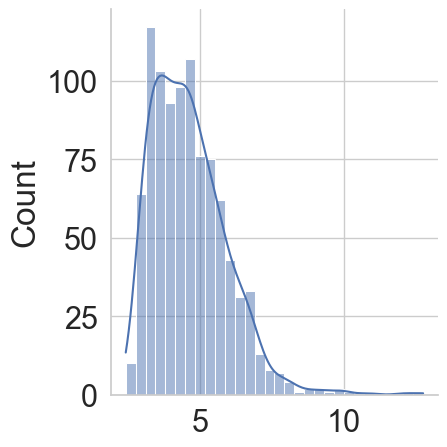

In [49]:
sns.displot(log_view_counts, kde=True)

<Axes: ylabel='Density'>

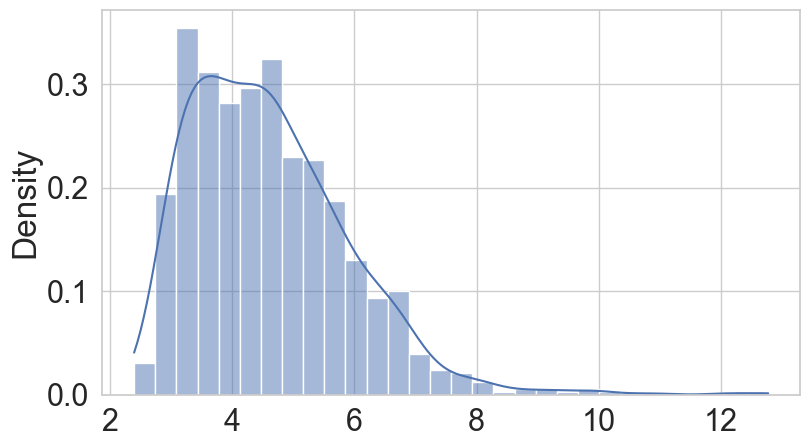

In [55]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=log_view_counts, kde=True, stat='density', ax=ax)

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.  
Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.  
Могут пригодиться:  
•	pivot()  
•	скользящее среднее

In [70]:
view_counts= ads.loc[ads.event == 'view']\
    .groupby(['date', 'ad_id'])\
    .size()\
    .reset_index(name='view_count')

In [85]:
view_counts.head()

date  ad_id  view_count
0 2019-04-01      2          83
1 2019-04-01      3         158
2 2019-04-01   4922        1211
3 2019-04-01   4933         642
4 2019-04-01   9418          17

In [83]:
daily_avg_views = view_counts.groupby('date')['view_count'].mean()

In [84]:
daily_avg_views.head()

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
Name: view_count, dtype: float64

In [89]:
rolling_avg = daily_avg_views.rolling(window=2).mean()

In [90]:
rolling_avg.head()

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
Name: view_count, dtype: float64

In [91]:
round(rolling_avg['2019-04-06'])

598

In [77]:
daily_ad_views = ads.loc[ads.event == 'view']\
    .pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')

In [78]:
daily_ad_views

date    2019-04-01  2019-04-02  2019-04-03  2019-04-04  2019-04-05  2019-04-06
ad_id                                                                         
2             83.0        18.0         NaN         NaN         NaN         NaN
3            158.0        26.0         NaN         NaN         NaN         NaN
1902           NaN         NaN        34.0         7.0         NaN         NaN
2064           NaN        28.0         7.0         NaN         NaN         NaN
2132           NaN         NaN        25.0        27.0         6.0         NaN
...            ...         ...         ...         ...         ...         ...
122004        85.0        15.0         NaN         NaN         NaN         NaN
122013         NaN         NaN         NaN       134.0        22.0         NaN
122023         NaN         NaN         NaN        53.0        15.0         NaN
122031         NaN         NaN         NaN         NaN       119.0        19.0
122078         NaN         NaN        36.0         6.0         NaN         NaN

[956 rows x 6 columns]